In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!mkdir data/
!wget https://raw.githubusercontent.com/janhvianurag/clk/main/ethanol_production_dataset.csv

--2024-09-01 12:28:21--  https://raw.githubusercontent.com/janhvianurag/clk/main/ethanol_production_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82162 (80K) [text/plain]
Saving to: ‘ethanol_production_dataset.csv’

ethanol_production_ 100%[===================>]  80.24K  --.-KB/s    in 0.08s   

2024-09-01 12:28:22 (998 KB/s) - ‘ethanol_production_dataset.csv’ saved [82162/82162]



In [ ]:
janhvi_df = pd.read_csv('/content/ethanol_production_dataset.csv')
df = janhvi_df.copy()
janhvi_df.describe()

,Feedstock Composition,Temperature Profiles,Pressure Conditions,Flow Rates,Reflux Ratio,Tray Efficiencies,Heat Duty,Operational Parameters,Product Purity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.490251,0.507027,0.502412,0.490362,0.494095,0.498465,0.493320,0.482366,0.486499
std,0.292136,0.292191,0.290672,0.286497,0.286814,0.289202,0.289744,0.284918,0.282231
min,0.004630,0.003220,0.000012,0.000653,0.000031,0.006180,0.001430,0.000241,0.000243
25%,0.235750,0.241000,0.261500,0.242000,0.245000,0.249500,0.240000,0.236250,0.249500
50%,0.496500,0.518500,0.501000,0.484500,0.494500,0.490500,0.484500,0.484000,0.479000
75%,0.744250,0.760250,0.759000,0.737250,0.739750,0.740250,0.756250,0.714250,0.716250
max,1.000000,0.999000,0.998000,1.000000,0.998000,0.999000,0.999000,0.999000,0.996000


In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Feedstock Composition    1000 non-null   float64
 1    Temperature Profiles    1000 non-null   float64
 2    Pressure Conditions     1000 non-null   float64
 3    Flow Rates              1000 non-null   float64
 4    Reflux Ratio            1000 non-null   float64
 5    Tray Efficiencies       1000 non-null   float64
 6    Heat Duty               1000 non-null   float64
 7    Operational Parameters  1000 non-null   float64
 8    Product Purity          1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


,0
Feedstock Composition,0
Temperature Profiles,0
Pressure Conditions,0
Flow Rates,0
Reflux Ratio,0
Tray Efficiencies,0
Heat Duty,0
Operational Parameters,0
Product Purity,0


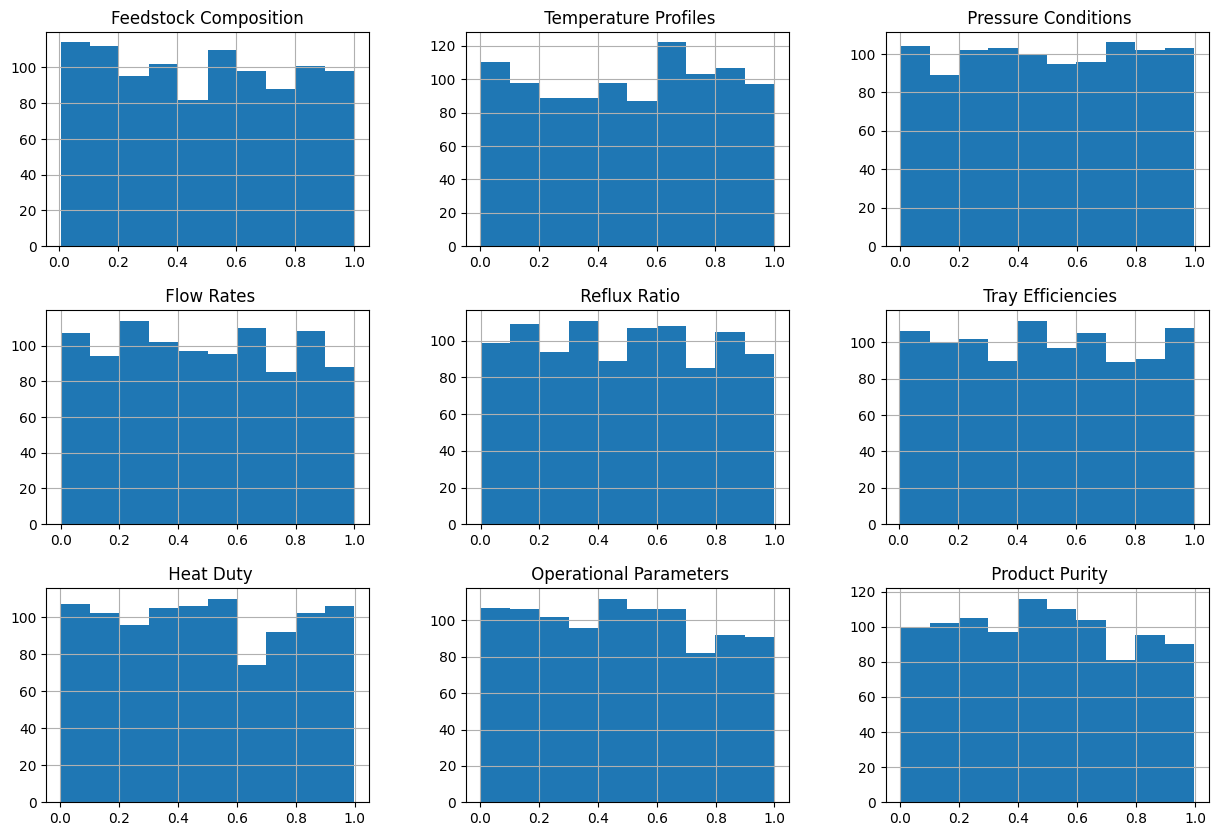

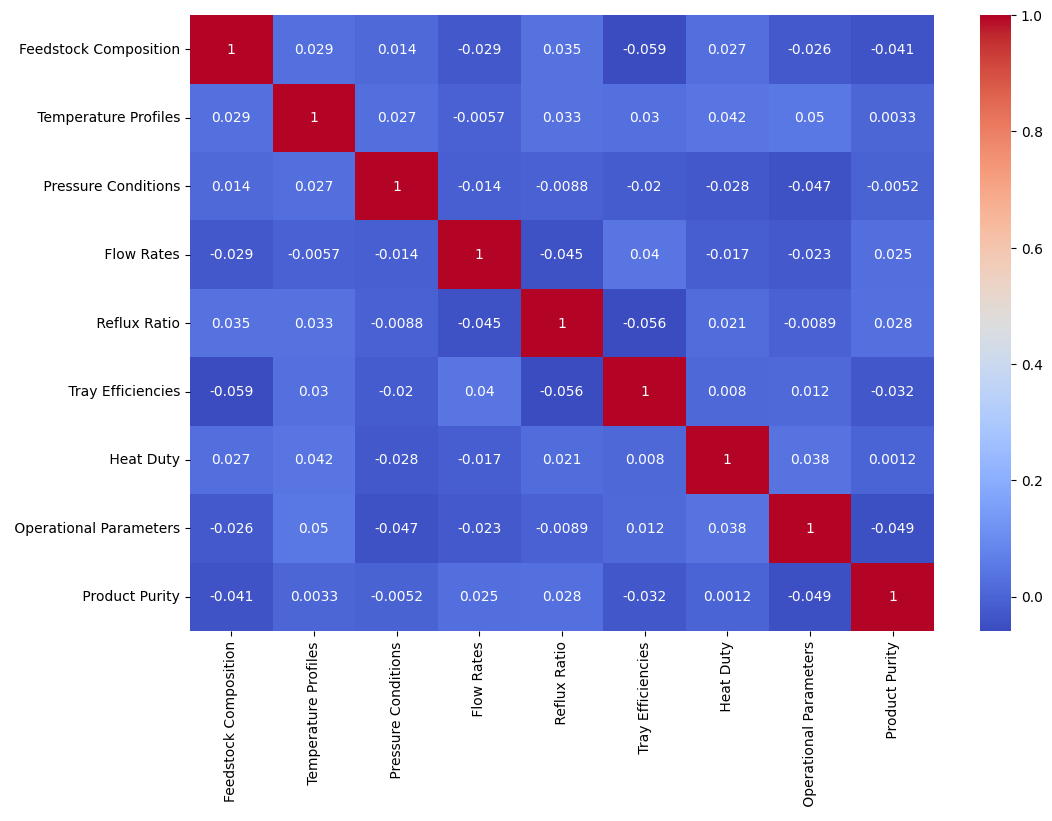

In [ ]:
# Univariate Analysis
# Histograms for each numerical feature
df.hist(figsize=(15, 10))
plt.show()




# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from scipy import stats
# Calculate Z-scores for each column
z_scores = stats.zscore(df)

# Define a threshold to identify outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Find and remove rows containing outliers
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Print the number of rows removed
print("Number of rows removed:", len(df) - len(df_no_outliers))

df=df_no_outliers

Number of rows removed: 0


In [ ]:
df.describe()

,Feedstock Composition,Temperature Profiles,Pressure Conditions,Flow Rates,Reflux Ratio,Tray Efficiencies,Heat Duty,Operational Parameters,Product Purity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.490251,0.507027,0.502412,0.490362,0.494095,0.498465,0.493320,0.482366,0.486499
std,0.292136,0.292191,0.290672,0.286497,0.286814,0.289202,0.289744,0.284918,0.282231
min,0.004630,0.003220,0.000012,0.000653,0.000031,0.006180,0.001430,0.000241,0.000243
25%,0.235750,0.241000,0.261500,0.242000,0.245000,0.249500,0.240000,0.236250,0.249500
50%,0.496500,0.518500,0.501000,0.484500,0.494500,0.490500,0.484500,0.484000,0.479000
75%,0.744250,0.760250,0.759000,0.737250,0.739750,0.740250,0.756250,0.714250,0.716250
max,1.000000,0.999000,0.998000,1.000000,0.998000,0.999000,0.999000,0.999000,0.996000


In [ ]:
# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=35)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Support Vector Machines (SVR) Regression model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)

In [ ]:
# Train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=35)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Train Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=35)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)

# Train Neural Network Regression model
nn_model = MLPRegressor(random_state=35)
nn_model.fit(X_train_scaled, y_train)
nn_pred = nn_model.predict(X_test_scaled)

# Evaluate models using Mean Squared Error (MSE) and R-squared (R^2) score
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} MSE: {mse:.2f}, R-squared: {r2:.2f}")

evaluate_model("SVR", y_test, svr_pred)
evaluate_model("Random Forest Regression", y_test, rf_pred)
evaluate_model("Gradient Boosting Regression", y_test, gb_pred)
evaluate_model("Neural Network Regression", y_test, nn_pred)

SVR MSE: 6670.58, R-squared: 0.54
Random Forest Regression MSE: 768.22, R-squared: 0.95
Gradient Boosting Regression MSE: 432.41, R-squared: 0.97
Neural Network Regression MSE: 478.92, R-squared: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Define a function to create scatter plots for actual vs. predicted values
def plot_predictions(model_name, y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f"{model_name} - Actual vs. Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

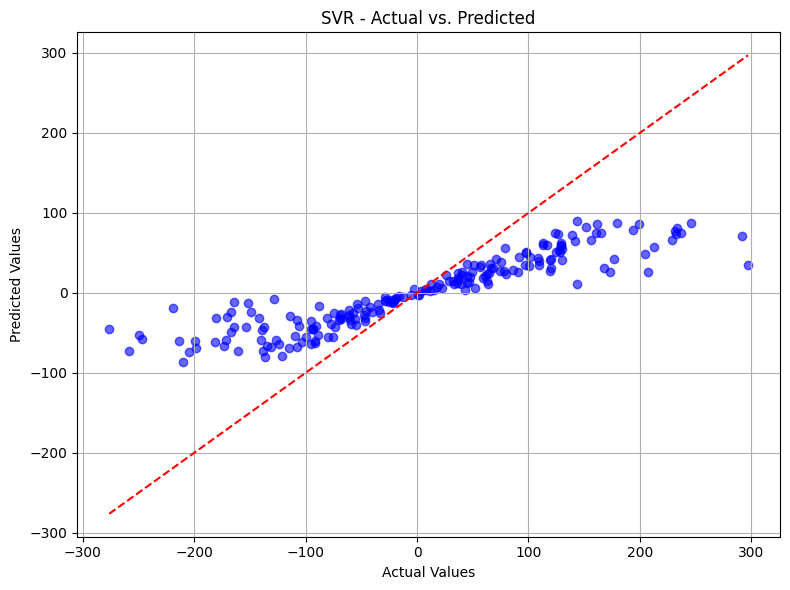

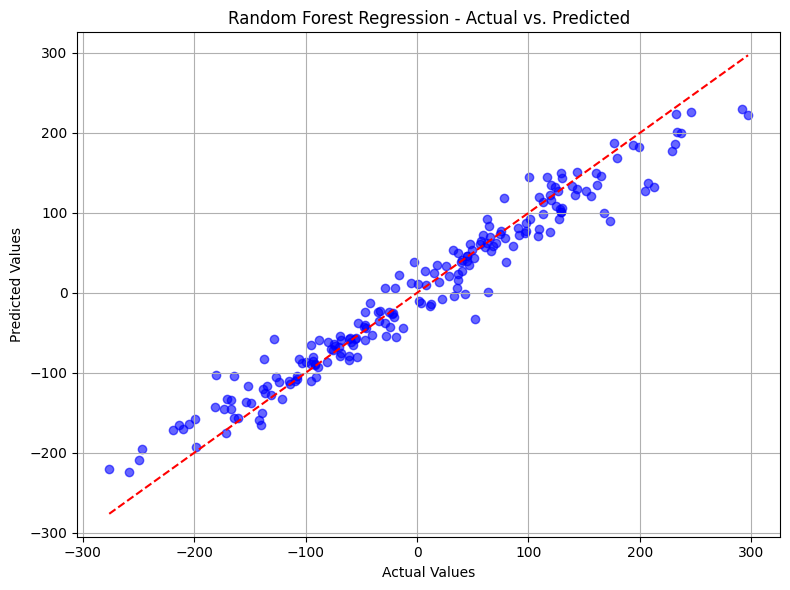

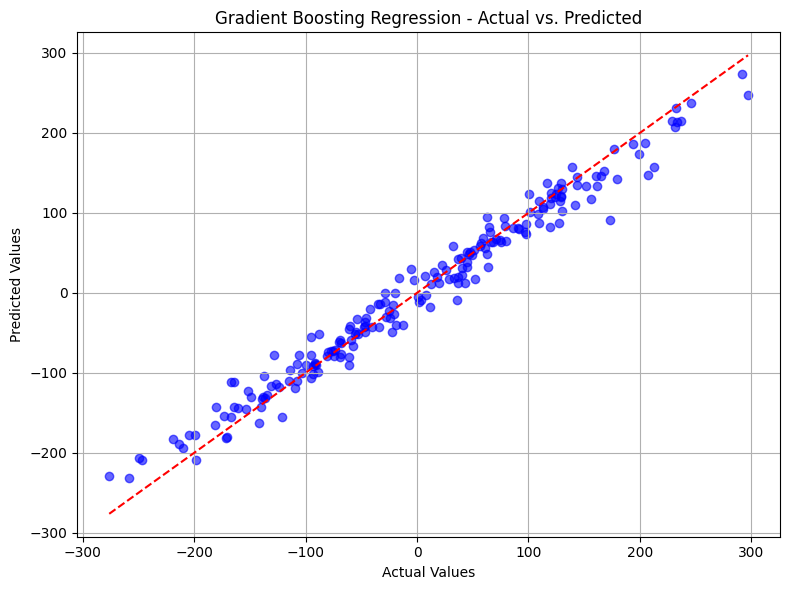

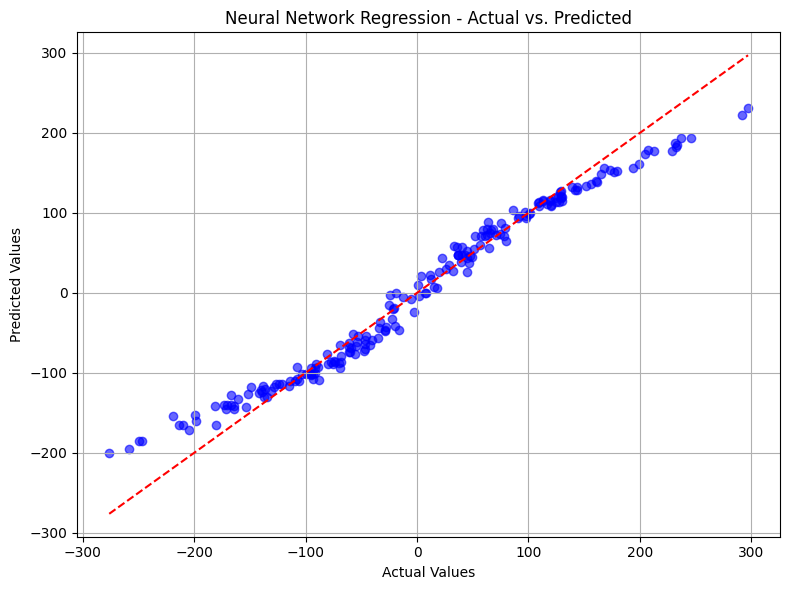

In [ ]:
# Plot actual vs. predicted values for each regression model
plot_predictions("SVR", y_test, svr_pred)
plot_predictions("Random Forest Regression", y_test, rf_pred)
plot_predictions("Gradient Boosting Regression", y_test, gb_pred)
plot_predictions("Neural Network Regression", y_test, nn_pred)

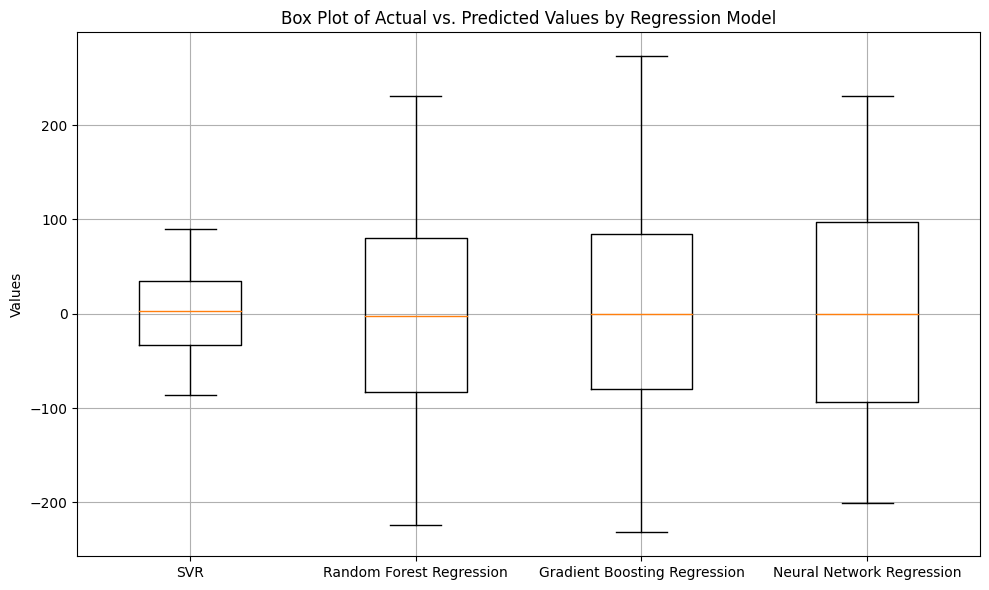

In [ ]:
import matplotlib.pyplot as plt

# Define a function to create box plots for actual vs. predicted values
def plot_boxplots(model_names, y_true_list, y_pred_list):
    plt.figure(figsize=(10, 6))
    plt.boxplot(y_pred_list, labels=model_names)
    plt.title("Box Plot of Actual vs. Predicted Values by Regression Model")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Prepare data for box plots
model_names = ["SVR", "Random Forest Regression", "Gradient Boosting Regression", "Neural Network Regression"]
y_pred_list = [svr_pred, rf_pred, gb_pred, nn_pred]
y_true_list = [y_test] * len(model_names)  # Use y_test for all models for comparison

# Plot box plots for actual vs. predicted values
plot_boxplots(model_names, y_true_list, y_pred_list)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'subsample': [0.6, 0.7, 0.8],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=35), param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
best_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_pred)
best_r2 = r2_score(y_test, best_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Model - MSE:", best_mse, "R^2:", best_r2)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.6}
Best Model - MSE: 215.89424231883538 R^2: 0.9851756904935515


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, KFold

# Define the hyperparameter grid
param_grid = {
    'subsample': [0.6, 0.7, 0.8],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
}

# Create the KFold object
kfold = KFold(n_splits=5)

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=35), param_grid, cv=kfold)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
best_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_pred)
best_r2 = r2_score(y_test, best_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Model - MSE:", best_mse, "R^2:", best_r2)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.6}
Best Model - MSE: 204.5629196420763 R^2: 0.9859537521624201
